# Overview

I.) Introduction to Bayes Theorem   
* Derivation of Bayes Theorem    
* Example Problem

II.) Estimating a Binomial Proportion   
* Bernoulli Trials    
* Inference on a coin
            1.) Notation and Assumptions    
            2.) Define and plot the Prior    
            3.) Generate the data    
            4.) Define and plot the Likelihood    
            5.) Find and plot the Posterior
            
III.) Introduction to the German Tank Problem    
* Background    
* Discrete Uniform Distribution    
* Notation    
* Sampling Algorithims    
* Example with K = 4     
* Example with K = 1
    
IV.) References     
V.) Further Reading    
            
            

# Introduction to Bayes Theorem

We can easily derieve Bayes Theorem from the defintion of conditional probability.

Defintion of Conditional Probability: Let A and B be events in the sample space. The conditional probability of event $A$ given event $B$, denoted $P(A|B)$ is defined as

$$
P(A|B) = \frac{P(A \cap B )}{P(B)}.
$$

Similarily, the conditional probability of B given A is given as 
$$
P(B|A) = \frac{P(B \cap A)}{P(A)}.
$$

Using this we can conclude that the $P(B \cap A)$ is given by
$$
 P(B \cap A)= P(A) P(B|A) = P(B) P(A|B).
$$

Now we can express the $P(B|A)$ as,
$$
P(B|A) = \frac{P(B) P(A|B)}{P(A)}.
$$

If B is partitioned into the events $B_1, B_2, \ldots B_m$, then we can write $P(A)$ as
$$
P(A) = \sum_{i=1}^m P(B_i)P(A|B_i).
$$

Therefore, for each $j = 1,2, \ldots$,m the $P(B_j|A)$ is given by
$$
P(B_j|A) = \frac{P(B_j) P(A|B_j)}{\sum_{i=1}^m P(B_i)P(A|B_i)}.
$$


## Example Problem
Suppose a disease afflicts 0.1% individuals in a population. A test has been developed for this disease. An idividual with the disease will test positive for the disease 99% of the time, and an individual without the disease will test postive 1% of time. Suppose an individual is selected at random and tested for the disease. The test shows a positive result. What is the probability that this individual actually has the disease?

Let D be the event that the selected person has the disease.    
Let A be the event that the selected person tests positive for the disease.

From the the problem we can deduce that $P(D) = 0.001$, $P(A|D) = 0.99$, and $P(A|D^C) = 0.01$.    
Since $P(D) = 0.001)$ we can conclude that $P(D^C) = 1-P(D) = 0.999)$. 

Therefore, 
$$
\begin{align}
P(D|A) &= \frac{P(D)P(A|D)}{P(D)P(A|D) + P(D^C)P(A|D^C)}\\
\\
&= \frac{0.001*0.99}{0.001*0.99 + 0.999*0.01}\\
\\
&\approx 0.0902.
\end{align}
$$

# Bernoulli Trials
A Bernoulli trial is trial in which there is exactly two possible outcomes, "success" and "failure". Defining the random variable, $X$ as $1$ is the Bernoulli trial is a "success" and $0$ if the Bernoulli trial is a "failure", the probability mass function (pmf) of a Bernoulli random variable is given by 

$$
f(x|\theta) = 
\begin{cases}
\theta^x (1-\theta)^{1-x} \hspace{5mm} & \mbox{for} \hspace{3mm} x \in \{0,1\}.\\
0 & \mbox{otherwise}\\
\end{cases}
$$

Alternatively, $f(x|\theta)$ can also be expressed as
$$
f(x|\theta) = 
\begin{cases} 
      \theta & \mbox{ for $x = 1$} \\
      1 - \theta & \mbox{ for $x = 0$ } \\
      0 & \mbox{otherwise}
   \end{cases}.
$$

## Flipping the Patriot's Superbowl Coin
Suppose the Patriots are accused of rigging a coin, and we are tasked with investigating the matter. 

Let's define the Bernoulli random variable $X$ as 
$$
X = \begin{cases} 
      1 & \textrm{if the coin shows heads} \\
      0 & \textrm{if the coin shows tails } \\
   \end{cases}.
$$

### Notation and Assumptions
$n$- the number of times we flip the coin   
$X_1, X_2, \ldots, X_n$- the resepective Bernoulli trial    
$X_1, X_2, \ldots, X_n$ are independent   
$X_1, X_2, \ldots, X_n \sim f(x|\theta)$- each Bernoulli trial is distributed accoring the function $f$    
$Y = \sum_{i=1}^n X_i$   
$\theta$- the probability the coin shows Heads (i.e.the $P(X = 1)$ 

### Define the prior
Let's define the prior, $\pi(\theta)$ using a beta distribution.
$$
\pi(\theta|\alpha, \beta) =
\begin{cases} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} 
\theta^{\alpha - 1} (1-\theta)^{\beta - 1}
& \textrm{for $\theta \in [0,1]$}\\
0 & \textrm{otherwise}
\end{cases}
$$

The mean and variance of the beta distribution are given by $\frac{\alpha}{\alpha + \beta}$ and 
$\frac{\alpha \beta}{(\alpha + \beta)^2(\alpha +\beta + 1)}$, respectively.

NOTE: The parameters of the prior distribution are referred to as hyperparameters.

#### Implement Prior in Python

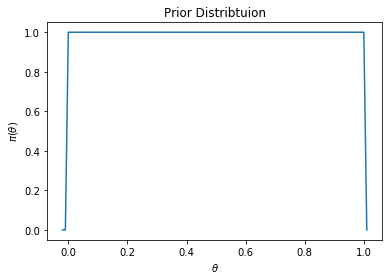

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#Define hyperparameters
prior_alpha, prior_beta = 1,1


xgrid = np.arange(-0.02,1.02,0.01)
#Evaluate the prior over the grid
prior_of_xgrid = beta.pdf(xgrid, a = prior_alpha, b = prior_beta)


#Plot the prior distribution
plt.plot(xgrid, prior_of_xgrid)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta)$')
plt.title("Prior Distribtuion")
plt.show()


### Generate the Data

In [18]:
#Define parameter and sample size
theta , n = 0.5, 10

#Generate Data
x = np.random.binomial(1, theta, n)
y = x.sum()
print(x)
print(y)

[0 1 1 0 1 0 1 1 1 0]
6


### Define the Likelihood
Let $f(\boldsymbol{x}| \theta)$ denote the joint pdf [probability density function] or pmf [probability mass function] of the sample $\boldsymbol{X}=\boldsymbol{x}$, the function of $\theta$ defined by
$$
L(\theta| \boldsymbol{x}) = \prod_{i = 1}^n f(x_i | \theta).
$$
is called the likelihood function.

In this case the likelihood is given by
$$
\begin{align}
L(\theta|y) &= \prod_{i=1}^n f(x_i|\theta) \\ 
 &= \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i}\\
 &= \theta^{\sum_{i=1}^n x_i}\hspace{2mm} (1-\theta)^{n - \sum_{i=1}^n x_i}\\
 &= \theta^{y}\hspace{2mm} (1-\theta)^{n - y}.
\end{align}
$$

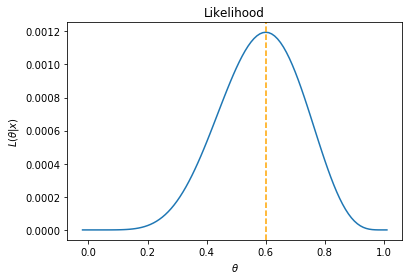

In [19]:
#Define the Likelihood
def Lhood_bern(theta):
    out = theta**y *(1-theta)**(n - y)
    return(out)


#Plot the Likelihood
plt.plot(xgrid, Lhood_bern(xgrid))
plt.axvline(x.mean(), color='orange', linestyle ="--")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta | x)$')
plt.title("Likelihood")
plt.show() 

The Likelihood function $L(\theta$|y) shown with the vertical, dashed line represents the maximum likelihood estimate for $\theta$, in this case $\bar x$.

# Compute the Posterior
Now that we have the prior and likelihood we can define the posterior as follows:
$$
\begin{align}
\pi (\theta|y) &\propto \pi(\theta) L(\theta|y)\\
&\propto \theta^{\alpha - 1} (1-\theta)^{\beta - 1} \theta^{y}\hspace{2mm} (1-\theta)^{n - y}\\
&\propto \theta^{\alpha + y - 1} (1-\theta)^{\beta + n - y - 1}\\
&\sim Beta(\alpha + y, \beta + n -y)
\end{align}
$$

NOTE: When for a given likelihood the prior distribution and the posterior distribution have the same functional form the prior distribution is called a conjugate prior for the given likelihood.

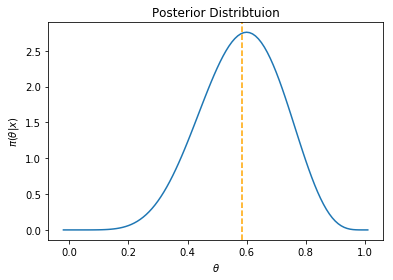

In [20]:
#Define Posterior hyperparameters
posterior_alpha = prior_alpha + x.sum()
posterior_beta = prior_beta + n - x.sum()

#Create functions to compute posterior mean and standard deviation
def beta_mean(a, b):
    return(a/(a + b))

def beta_stdv(a, b):
    denom = (a + b)**2 *(a + b + 1)
    vrnc = a*b/denom
    return(np.sqrt(vrnc))

post_mean = beta_mean(posterior_alpha, posterior_beta)
post_stdv = beta_stdv(posterior_alpha, posterior_beta)

#Evaluate the postior over the grid
posterior_of_xgrid = beta.pdf(xgrid, a = posterior_alpha, b = posterior_beta)
#Plot the posterior
plt.plot(xgrid, posterior_of_xgrid)
plt.axvline(x=post_mean, color='orange', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta | x)$')
plt.title("Posterior Distribtuion")
plt.show()


The posterior distribution for $\theta$ with a Beta prior and Bernoulli likelihood. The dashed line is the posterior mean.

In [21]:
print("The posterior mean is "+ str(post_mean) + 
" and the posterior standard deviation is " + str(post_stdv ))

The posterior mean is 0.583333333333 and the posterior standard deviation is 0.136735442357


# German Tank Problem

### Background
In WWII, Germany manufactured their tanks with consectuive serial numbers. The Allied Powers sought to exploit this to help them determine how many tanks Germany possessed. The problem can be defined as estimating the maximum of a discrete uniform distribution based on a sample without replacement.

#### Discrete Uniform Distribution
A random variable X is said to have the discrete uniform distribution if and only if the the probability mass function is given by
$$
P(X =x |n) = 
\begin{cases}
\frac{1}{n} & \textrm{for $x \in \{ a, a+1, \ldots b \} $ where $n = b - a +1$}\\
0 & \textrm{otherwise}\\
\end{cases}
$$

### Notation
$N$ is the maximum serial number  
$M$ is the maximum serial number in the sample  
$K$ is the number of tanks in the sample  
$n, m$ and $k$ are a possible or observed value for each of the respective variables


### Bayesian view
#### Prior
Take prior distribution of $N$ given by
$$
P(N = n | k) = 
\begin{cases}
\frac{1}{\Omega - k} & \mbox{for $n \geq k$}\\
0 & \mbox{for $n < k$}
\end{cases}
$$

and the likelihood given by
$$
P(M = m|n,k) = 
\begin{cases}
\frac{\binom{m-1}{k-1}}{\binom{n}{k}} & \mbox{for $m \leq k$}\\.
0 & \mbox{otherwise}
\end{cases}
$$

#### Posterior 
The posterior distrubtion for $N$ by observing $k > 1$ tanks with maximum serial number $M$ is given by
$$
P(N = n \hspace{1mm}| \hspace{1mm} M=m, K=k)= 
\begin{cases}
0 & \textrm{if $n<k$}\\
\frac{k-1}{k} 
\frac{\binom{m-1}{k-1}}{\binom{n}{k}} & \textrm{if $n \geq k$}
\end{cases}.
$$

#### Posterior mean  and standard deviation
For $k>3$ the posterior mean $\mu$ and standard deviation $\sigma$ are given by
$$
\begin{align}
\mu &= \frac{(m-1)(k-1)}{k-2} \\
\sigma &= \sqrt{\frac{(m-1)(k-1)(m-k+1)}{(k-3)(k-2)^2}}
\end{align}
$$

## Example with K = 4
Suppose we observe 4 tanks with the highest serial number being 64. Below is a python function for computing the posterior distribution.

In [22]:
from scipy.misc import comb

def eval_point(n):
    if n <m:
        return(0)
    else:
        numer = (k-1)/k *comb(m-1,k-1)
        denom = comb(n, k)
        return(numer/denom)

def posterior(n):
    list_eval_points = []
    for m in n:
        eval = eval_point(m)
        list_eval_points.append(eval)
    out = np.array(list_eval_points)
    return(out)    


In [23]:
#Define the parameters
m = 64
k = 4
N = np.array(range(1,201))

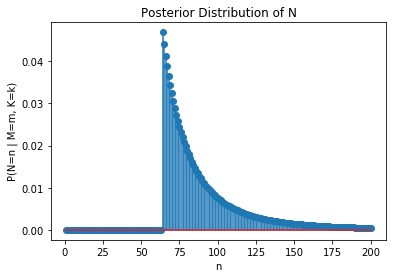

In [24]:
fig, ax = plt.subplots()
ax.stem(N, posterior(N))
plt.xlabel("n")
plt.ylabel("P(N=n | M=m, K=k)")
plt.title("Posterior Distribution of N")
plt.show()

## Results
Comparison of German records to statistical estimates shows that the statistical estimates were much more accurate then the intelligence estimates.


# Sampling Algorithims
Often times the posterior distrubtion does not have a simple function form. In which case describing the posterior distribution may require a sampling from the posterior distribution using a sampling algorithim. Below are some of the sampling algorithims listed in order of complexity commonly used in Bayesian statistics.

* Accept/Reject method
* Metropolis-Hastings
* Gibbs Sampling

# Example with K = 1

In [8]:
import pymc3 as pm

In [41]:
y = np.array([60])

model = pm.Model()
with model:
    #Prior
    N = pm.DiscreteUniform("N", lower=y.max(), upper=1000)
    #Likelihood
    y_obs = pm.DiscreteUniform("y_obs", lower=0, upper=N, observed=y)
    
    step = pm.Metropolis()
    start = {"N": y.max()}
    trace = pm.sample(100000, step, start, chain=1, njobs=1)

100%|███████████████████████████████| 100000/100000 [00:06<00:00, 14732.81it/s]


In [42]:
pm.summary(trace[10000:])


N:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  335.416          258.477          3.089            [60.000, 872.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  64.000         120.000        244.000        499.000        935.000



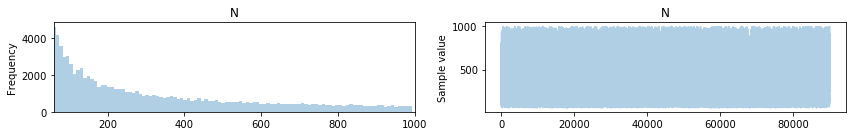

In [43]:
pm.traceplot(trace[10000:])
plt.show()